In [1]:
# simple notebook to take a text corpus and work out word frequencies

In [2]:
# following only used for development, reloads the modules with any code changes
%load_ext autoreload
%autoreload 2

# inline matplotlib charts
%matplotlib inline

In [3]:
# import our text mining toolkit
import text_mining_toolkit as tmt

In [5]:
cr = tmt.corpus_reader.CorpusReader(content_directory="data_sets/recipes/txt/", text_filename_pattern="??.txt")

content_directory =  data_sets/recipes/txt/
text_filename_pattern =  ??.txt
self.documents populated =  22


In [6]:
a = cr.get_text_by_document('13.txt')
print(a)

ARTICHOKES IN MOLD

(Sformato di carciofi)

Remove the outside leaves of the artichokes, the harder part of all
leaves, and clean the stalks without removing them.

Cut each artichoke into four parts and put them to boil in salt water
for only five minutes. If left longer on the fire they become too soaked
in water and lose their taste. Remove from the water, drain them, grind
or pound and rub them through a sieve. Season the pulp so obtained with
two or three beaten eggs, two or three tablespoonfuls of =Balsamella=
(No. 54) grated cheese, salt and a taste of nutmeg, but taste the
seasoning several times to see that it is correctly dosed.

Place in a mold with brown stock or meat gravy (in that case use a mold
with a hole) and cook in double boiler.


In [7]:
# wordcount to wordcloud
# pipeline

# get all text from corpus
a = cr.get_all_text()

# simplify whitespace (remove newlines)
b = tmt.text_processing.simplify_whitespace(a)

# only keep alphanumeric characters, removes punctuation
c = tmt.text_processing.keep_alphanumeric(b)

# make lowercase
d = tmt.text_processing.to_lowercase(c)

# split into words list
dl = tmt.text_processing.split_text_into_words(d)

# remove stop words
el = tmt.word_processing.remove_stop_words(dl, "./stopwords/minimal-stop.txt")

# only keep words with min length 5
fl = tmt.word_processing.keep_words_min_length(el,5)

#print(b, '\n')
#print(c, '\n')
#print(dl, '\n')
#print(el, '\n')
#print(fl, '\'n)

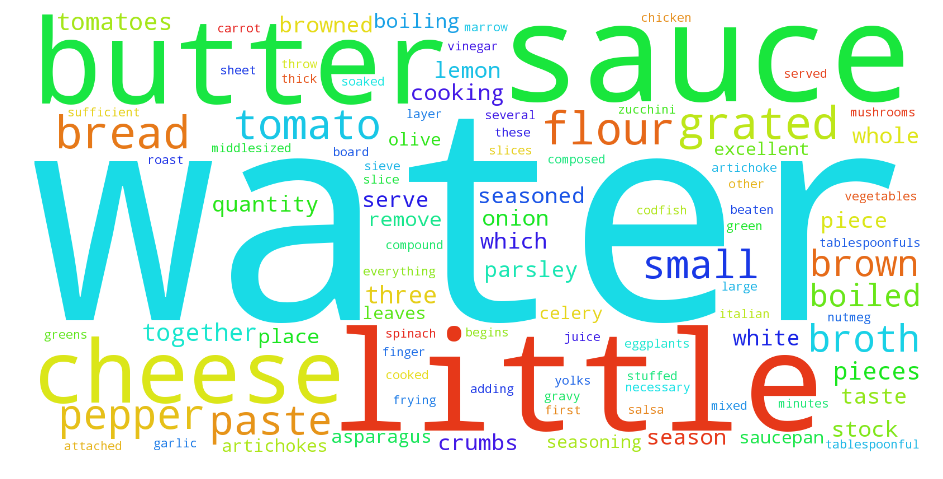

In [9]:
# word cloud
wc = tmt.word_processing.count_word_occurance(fl)
tmt.visualisation.plot_wordcloud(wc, most_common=None)